In [1]:
import torch
import torch.nn as nn

https://medium.com/dair-ai/a-simple-neural-network-from-scratch-with-pytorch-and-google-colab-c7f3830618e0

### <span style="color:blue">1. Pobranie baza danych csv</span>
Zacznijmy od utworzenia przykładowych danych za pomocą torch.

In [2]:
import pandas as pd
df = pd.read_csv('c:/1/WorldHappinessReport.csv')
# usecols=[1,2,3,4,5]
df.head(3)

,Unnamed: 0,Country,Region,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual,Year
0,0,Afghanistan,Southern Asia,153.0,3.575,0.31982,0.30285,0.30335,0.23414,0.09719,0.36510,1.95210,2015.0
1,1,Albania,Central and Eastern Europe,95.0,4.959,0.87867,0.80434,0.81325,0.35733,0.06413,0.14272,1.89894,2015.0
2,2,Algeria,Middle East and Northern Africa,68.0,5.605,0.93929,1.07772,0.61766,0.28579,0.17383,0.07822,2.43209,2015.0


In [3]:
df.shape

(495, 13)

### <span style="color:blue">2. Usuwanie pustych komórek NaN </span>
Sieci nieuronowe nie lubiś pustych komórek NaN

In [4]:
df = df.dropna(how ='any')
df.isnull().sum()

Unnamed: 0                       0
Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
Year                             0
dtype: int64

### Wybieram zmienne do modelu

In [5]:
df.columns

Index(['Unnamed: 0', 'Country', 'Region', 'Happiness Rank', 'Happiness Score',
       'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)',
       'Freedom', 'Trust (Government Corruption)', 'Generosity',
       'Dystopia Residual', 'Year'],
      dtype='object')

'Happiness Score','Economy (GDP per Capita)','Freedom', 'Trust (Government Corruption)'

### <span style="color:blue">3. Przekształcanie na tensor zmiennych niezależnych</span>

In [6]:
X = torch.tensor((df['Economy (GDP per Capita)'],df['Freedom'],df['Trust (Government Corruption)']), dtype=torch.float)
X

tensor([[0.3198, 0.8787, 0.9393,  ..., 0.5917, 0.6364, 0.3758],
        [0.2341, 0.3573, 0.2858,  ..., 0.2495, 0.4616, 0.3364],
        [0.0972, 0.0641, 0.1738,  ..., 0.0568, 0.0782, 0.0954]])

#### <span style="color:blue"> 3.1 TRansponuje wektor zmiennych niezależnych aby stał się kolumną</span>

In [7]:
X = torch.transpose(X.flip(0),0,1)
X

tensor([[0.0972, 0.2341, 0.3198],
        [0.0641, 0.3573, 0.8787],
        [0.1738, 0.2858, 0.9393],
        ...,
        [0.0568, 0.2495, 0.5917],
        [0.0782, 0.4616, 0.6364],
        [0.0954, 0.3364, 0.3758]])

Ma mieć 22 obserwacje i jeden wymiar wynikowy

<span style="color:green">torch.Size([22, 4])</span>

In [8]:
X.size()

torch.Size([469, 3])

### <span style="color:blue">4. Przekształcanie na tensor zmiennych zależnych</span>

In [9]:
y = torch.tensor((df['Happiness Score']), dtype=torch.float)
y

tensor([3.5750, 4.9590, 5.6050, 4.0330, 6.5740, 4.3500, 7.2840, 7.2000, 5.2120,
        5.9600, 4.6940, 5.8130, 6.9370, 3.3400, 5.2530, 5.8900, 4.9490, 4.3320,
        6.9830, 4.2180, 3.5870, 2.9050, 3.8190, 4.2520, 7.4270, 3.6780, 3.6670,
        6.6700, 5.1400, 6.4770, 3.9560, 3.9890, 4.5170, 7.2260, 5.7590, 5.6890,
        6.5050, 7.5270, 4.3690, 4.8850, 5.9750, 4.1940, 6.1300, 5.4290, 4.5120,
        7.4060, 6.5750, 3.8960, 4.2970, 6.7500, 4.6330, 4.8570, 6.1230, 3.6560,
        4.5180, 4.7880, 5.4740, 4.8000, 7.5610, 4.5650, 5.3990, 4.6860, 4.6770,
        6.9400, 7.2780, 5.9480, 3.6550, 5.7090, 5.9870, 5.1920, 5.8550, 4.4190,
        5.5890, 6.2950, 5.2860, 4.8760, 5.0980, 4.8390, 4.8980, 4.5710, 5.7540,
        5.8330, 6.9460, 5.0070, 3.6810, 4.2920, 5.7700, 3.9950, 6.3020, 4.4360,
        5.4770, 7.1870, 5.8890, 4.8740, 5.1920, 5.0130, 4.9710, 4.3070, 4.5140,
        7.3780, 7.2860, 5.8280, 3.8450, 5.2680, 5.6950, 7.5220, 6.8530, 5.1940,
        4.7150, 6.7860, 5.8780, 5.8240, 

#### <span style="color:blue"> 4.1 TRansponuje wektor wynikowy aby stał się kolumną</span>

In [10]:
y = y.view(y.shape[0],1)

In [11]:
y

tensor([[3.5750],
        [4.9590],
        [5.6050],
        [4.0330],
        [6.5740],
        [4.3500],
        [7.2840],
        [7.2000],
        [5.2120],
        [5.9600],
        [4.6940],
        [5.8130],
        [6.9370],
        [3.3400],
        [5.2530],
        [5.8900],
        [4.9490],
        [4.3320],
        [6.9830],
        [4.2180],
        [3.5870],
        [2.9050],
        [3.8190],
        [4.2520],
        [7.4270],
        [3.6780],
        [3.6670],
        [6.6700],
        [5.1400],
        [6.4770],
        [3.9560],
        [3.9890],
        [4.5170],
        [7.2260],
        [5.7590],
        [5.6890],
        [6.5050],
        [7.5270],
        [4.3690],
        [4.8850],
        [5.9750],
        [4.1940],
        [6.1300],
        [5.4290],
        [4.5120],
        [7.4060],
        [6.5750],
        [3.8960],
        [4.2970],
        [6.7500],
        [4.6330],
        [4.8570],
        [6.1230],
        [3.6560],
        [4.5180],
        [4

Ma mieć 22 obserwacje i jeden wymiar wynikowy

<span style="color:green">torch.Size([22, 1])</span>

In [12]:
y.size()

torch.Size([469, 1])

#### Sprawdzam czy wyniki tensorów są OK

In [13]:
print('Tensor zmiennych opisujących:', X.size())
print('Tensor zmiennych wynikowych: ',y.size())

Tensor zmiennych opisujących: torch.Size([469, 3])
Tensor zmiennych wynikowych:  torch.Size([469, 1])


#### Wartość xPredicted

Zmienna xPredicted jest pojedynczym wejściem, dla którego chcemy przewidzieć ocenę z wykorzystaniem parametrów wyuczonych przez sieć neuronową.

In [14]:
xPredicted = torch.tensor(([0.0954, 0.3364, 0.3758]), dtype=torch.float)
print('Tensor zmiennych do prognozy: ',xPredicted.size())

Tensor zmiennych do prognozy:  torch.Size([3])


#### Sprawdzam czy wymiary tensorów są OK

Tensor zmiennych opisujących   : torch.Size([22, 4])

Tensor zmiennych wynikowych    : torch.Size([22, 1])

Tensor 1 obserwacji do prognozy: torch.Size([4])

In [15]:
print('Tensor zmiennych opisujących   :',X.size())
print('Tensor zmiennych wynikowych    :',y.size())
print('Tensor 1 obserwacji do prognozy:',xPredicted.size())

Tensor zmiennych opisujących   : torch.Size([469, 3])
Tensor zmiennych wynikowych    : torch.Size([469, 1])
Tensor 1 obserwacji do prognozy: torch.Size([3])


### Skalowanie i normalizacja
Dane przetwarzane przez sieć pochodzą najczęściej z obserwacji pewnych wartości w badanym modelu. Ich skala wartości zazwyczaj nie na bezpośrednie wprowadzenie na wejścia sieci. Istnieje kilka popularnych metod skalowania: 

skalowanie względem wartości maksymalnej: 

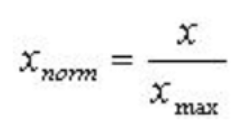


### Skalowanie wartości X

In [16]:
# scale units
X_max, _ = torch.max(X, 0)
X = torch.div(X, X_max)


print(X)

tensor([[0.1761, 0.3496, 0.1710],
        [0.1162, 0.5335, 0.4697],
        [0.3150, 0.4267, 0.5021],
        ...,
        [0.1029, 0.3725, 0.3163],
        [0.1417, 0.6892, 0.3402],
        [0.1728, 0.5023, 0.2009]])


### Skalowanie wartości y i wartości pod którą szukamy prognozy

In [17]:
xPredicted_max, _ = torch.max(xPredicted, 0)
xPredicted = torch.div(xPredicted, xPredicted_max)
y = y / 100  # max test score is 100
print(xPredicted)
print(y)

tensor([0.2539, 0.8952, 1.0000])
tensor([[0.0358],
        [0.0496],
        [0.0560],
        [0.0403],
        [0.0657],
        [0.0435],
        [0.0728],
        [0.0720],
        [0.0521],
        [0.0596],
        [0.0469],
        [0.0581],
        [0.0694],
        [0.0334],
        [0.0525],
        [0.0589],
        [0.0495],
        [0.0433],
        [0.0698],
        [0.0422],
        [0.0359],
        [0.0291],
        [0.0382],
        [0.0425],
        [0.0743],
        [0.0368],
        [0.0367],
        [0.0667],
        [0.0514],
        [0.0648],
        [0.0396],
        [0.0399],
        [0.0452],
        [0.0723],
        [0.0576],
        [0.0569],
        [0.0650],
        [0.0753],
        [0.0437],
        [0.0489],
        [0.0597],
        [0.0419],
        [0.0613],
        [0.0543],
        [0.0451],
        [0.0741],
        [0.0657],
        [0.0390],
        [0.0430],
        [0.0675],
        [0.0463],
        [0.0486],
        [0.0612],
        [0.03

        [0.0388]])


#### DEFINIOWANIE MODELU

In [18]:
class Neural_Network(nn.Module):
    def __init__(self, ):
        super(Neural_Network, self).__init__()
        # parameters
        # TODO: parameters can be parameterized instead of declaring them here
        self.inputSize = 3   # ---Tyle ile jest obserwacji (kolumn po trnspozycji macierzy X)
        self.outputSize = 1
        self.hiddenSize = 3  # ---Tyle ile jest obserwacji (kolumn po trnspozycji macierzy X)
        
        # weights
        self.W1 = torch.randn(self.inputSize, self.hiddenSize) # 6 X 4 tensor
        self.W2 = torch.randn(self.hiddenSize, self.outputSize) # 6 X 1 tensor
        
    def forward(self, X):
        self.z = torch.matmul(X, self.W1) # 3 X 3 ".dot" does not broadcast in PyTorch
        self.z2 = self.sigmoid(self.z) # activation function
        self.z3 = torch.matmul(self.z2, self.W2)
        o = self.sigmoid(self.z3) # final activation function
        return o
        
    def sigmoid(self, s):
        return 1 / (1 + torch.exp(-s))
    
    def sigmoidPrime(self, s):
        # derivative of sigmoid
        return s * (1 - s)
    
    def backward(self, X, y, o):
        self.o_error = y - o # error in output
        self.o_delta = self.o_error * self.sigmoidPrime(o) # derivative of sig to error
        self.z2_error = torch.matmul(self.o_delta, torch.t(self.W2))
        self.z2_delta = self.z2_error * self.sigmoidPrime(self.z2)
        self.W1 += torch.matmul(torch.t(X), self.z2_delta)
        self.W2 += torch.matmul(torch.t(self.z2), self.o_delta)
        
    def train(self, X, y):
        # forward + backward pass for training
        o = self.forward(X)
        self.backward(X, y, o)
        
    def saveWeights(self, model):
        # we will use the PyTorch internal storage functions
        torch.save(model, "NN")
        # you can reload model with all the weights and so forth with:
        # torch.load("NN")
        
    def predict(self):
        print ("Predicted data based on trained weights: ")
        print ("Input (scaled): \n" + str(xPredicted))
        print ("Output: \n" + str(self.forward(xPredicted)))      

### Trening
Pozostało już tylko trenować sieć neuronową. Najpierw tworzymy instancję wykresu obliczeniowego, który właśnie zbudowaliśmy:

In [19]:
NN = Neural_Network()

In [20]:
X.size()

torch.Size([469, 3])

In [21]:
y.size()

torch.Size([469, 1])

Następnie trenujemy model do 150 rund. Zauważ, że w PyTorch NN(X) automatycznie wywołuje funkcję forward, więc nie ma potrzeby jawnego wywoływania NN.forward(X).

Po uzyskaniu przewidywanego wyniku dla każdej rundy szkolenia, obliczamy stratę za pomocą następującego kodu:

In [22]:
torch.mean((y - NN(X))**2).detach().item()

0.40624794363975525

In [23]:
NN = Neural_Network()
for i in range(1500):  # trains the NN 150 times
    print ("#" + str(i) + " Loss: " + str(torch.mean((y - NN(X))**2).detach().item()))  # mean sum squared loss
    NN.train(X, y)
NN.saveWeights(NN)
NN.predict()

#0 Loss: 0.5004304647445679
#1 Loss: 0.0029602241702377796
#2 Loss: 0.002934435848146677
#3 Loss: 0.002880099229514599
#4 Loss: 0.002740312134847045
#5 Loss: 0.0023298615124076605
#6 Loss: 0.0020397398620843887
#7 Loss: 0.0022606002166867256
#8 Loss: 0.0020214964170008898
#9 Loss: 0.0025028176605701447
#10 Loss: 0.0017659201985225081
#11 Loss: 0.001771245850250125
#12 Loss: 0.002124050399288535
#13 Loss: 0.0020693603437393904
#14 Loss: 0.002923505147919059
#15 Loss: 0.002863743342459202
#16 Loss: 0.002701869932934642
#17 Loss: 0.0021242767106741667
#18 Loss: 0.0019710841588675976
#19 Loss: 0.0029289224185049534
#20 Loss: 0.00287971505895257
#21 Loss: 0.0027575211133807898
#22 Loss: 0.0023470756132155657
#23 Loss: 0.0014317133463919163
#24 Loss: 0.0015087684150785208
#25 Loss: 0.002295431448146701
#26 Loss: 0.0030042966827750206
#27 Loss: 0.0030037632677704096
#28 Loss: 0.003003164893016219
#29 Loss: 0.0030024931766092777
#30 Loss: 0.003001732286065817
#31 Loss: 0.0030008640605956316
#3

#255 Loss: 0.00256833853200078
#256 Loss: 0.001910130144096911
#257 Loss: 0.0018696757033467293
#258 Loss: 0.00285890931263566
#259 Loss: 0.0027489543426781893
#260 Loss: 0.0024541120510548353
#261 Loss: 0.0016181071987375617
#262 Loss: 0.0022189682349562645
#263 Loss: 0.002984948456287384
#264 Loss: 0.0029807467944920063
#265 Loss: 0.0029752713162451982
#266 Loss: 0.002967892214655876
#267 Loss: 0.002957517746835947
#268 Loss: 0.0029421153012663126
#269 Loss: 0.0029175151139497757
#270 Loss: 0.002874053083360195
#271 Loss: 0.0027854032814502716
#272 Loss: 0.0025642227847129107
#273 Loss: 0.0019120918586850166
#274 Loss: 0.001843478181399405
#275 Loss: 0.0028241060208529234
#276 Loss: 0.002664936473593116
#277 Loss: 0.002203986281529069
#278 Loss: 0.0014116477686911821
#279 Loss: 0.0014620927395299077
#280 Loss: 0.0018740649102255702
#281 Loss: 0.0028882327023893595
#282 Loss: 0.0028127662371844053
#283 Loss: 0.0026285285130143166
#284 Loss: 0.0020682192407548428
#285 Loss: 0.001563303

#506 Loss: 0.0028540322091430426
#507 Loss: 0.002737889066338539
#508 Loss: 0.002422776073217392
#509 Loss: 0.0015502353198826313
#510 Loss: 0.0021635477896779776
#511 Loss: 0.002981484169140458
#512 Loss: 0.002976215910166502
#513 Loss: 0.002969146706163883
#514 Loss: 0.0029592637438327074
#515 Loss: 0.0029446964617818594
#516 Loss: 0.002921659965068102
#517 Loss: 0.0028815220575779676
#518 Loss: 0.0028012592811137438
#519 Loss: 0.0026061239186674356
#520 Loss: 0.002027646405622363
#521 Loss: 0.001588893122971058
#522 Loss: 0.002434578724205494
#523 Loss: 0.0015586712397634983
#524 Loss: 0.002230745041742921
#525 Loss: 0.002991769462823868
#526 Loss: 0.0029892809689044952
#527 Loss: 0.0029862115625292063
#528 Loss: 0.00298234517686069
#529 Loss: 0.002977348631247878
#530 Loss: 0.0029706908389925957
#531 Loss: 0.0029614607337862253
#532 Loss: 0.0029480073135346174
#533 Loss: 0.0029270502272993326
#534 Loss: 0.00289128627628088
#535 Loss: 0.002821863628923893
#536 Loss: 0.00265979790128

#757 Loss: 0.0029549163300544024
#758 Loss: 0.002938146935775876
#759 Loss: 0.002910871524363756
#760 Loss: 0.0028613966424018145
#761 Loss: 0.0027564300689846277
#762 Loss: 0.0024796631187200546
#763 Loss: 0.0016683137509971857
#764 Loss: 0.0022400475572794676
#765 Loss: 0.002991656307131052
#766 Loss: 0.0029892066959291697
#767 Loss: 0.0029861973598599434
#768 Loss: 0.0029824248049408197
#769 Loss: 0.002977578202262521
#770 Loss: 0.0029711639508605003
#771 Loss: 0.002962350146844983
#772 Loss: 0.002949653659015894
#773 Loss: 0.0029301776085048914
#774 Loss: 0.0028976539615541697
#775 Loss: 0.0028364609461277723
#776 Loss: 0.002699898090213537
#777 Loss: 0.002320647006854415
#778 Loss: 0.001417756313458085
#779 Loss: 0.0016489836852997541
#780 Loss: 0.0026373770087957382
#781 Loss: 0.0021056928671896458
#782 Loss: 0.0014407581184059381
#783 Loss: 0.0020054734777659178
#784 Loss: 0.001634781016036868
#785 Loss: 0.002688609529286623
#786 Loss: 0.0022489691618829966
#787 Loss: 0.00132015

#1008 Loss: 0.002246734220534563
#1009 Loss: 0.0029935683123767376
#1010 Loss: 0.0029915417544543743
#1011 Loss: 0.0029890944715589285
#1012 Loss: 0.002986092586070299
#1013 Loss: 0.002982331905514002
#1014 Loss: 0.0029775078874081373
#1015 Loss: 0.0029711336828768253
#1016 Loss: 0.0029623955488204956
#1017 Loss: 0.0029498396907001734
#1018 Loss: 0.002930647460743785
#1019 Loss: 0.002898754319176078
#1020 Loss: 0.002839153166860342
#1021 Loss: 0.0027074147947132587
#1022 Loss: 0.002345069544389844
#1023 Loss: 0.001436653663404286
#1024 Loss: 0.0018144459463655949
#1025 Loss: 0.002855696715414524
#1026 Loss: 0.0027438646648079157
#1027 Loss: 0.002443718956783414
#1028 Loss: 0.0015790467150509357
#1029 Loss: 0.0022693383507430553
#1030 Loss: 0.002996159018948674
#1031 Loss: 0.00299461861141026
#1032 Loss: 0.00299279997125268
#1033 Loss: 0.0029906262643635273
#1034 Loss: 0.0029879873618483543
#1035 Loss: 0.0029847256373614073
#1036 Loss: 0.0029806061647832394
#1037 Loss: 0.002975267125293

#1251 Loss: 0.0030098925344645977
#1252 Loss: 0.0030098219867795706
#1253 Loss: 0.0030097493436187506
#1254 Loss: 0.0030096732079982758
#1255 Loss: 0.0030095940455794334
#1256 Loss: 0.0030095111578702927
#1257 Loss: 0.0030094250105321407
#1258 Loss: 0.0030093358363956213
#1259 Loss: 0.003009242005646229
#1260 Loss: 0.003009144216775894
#1261 Loss: 0.0030090417712926865
#1262 Loss: 0.003008935134857893
#1263 Loss: 0.003008822677657008
#1264 Loss: 0.003008705098181963
#1265 Loss: 0.0030085809994488955
#1266 Loss: 0.0030084510799497366
#1267 Loss: 0.0030083146411925554
#1268 Loss: 0.0030081707518547773
#1269 Loss: 0.0030080180149525404
#1270 Loss: 0.0030078578274697065
#1271 Loss: 0.003007687395438552
#1272 Loss: 0.003007506253197789
#1273 Loss: 0.003007314633578062
#1274 Loss: 0.0030071106739342213
#1275 Loss: 0.0030068927444517612
#1276 Loss: 0.0030066617764532566
#1277 Loss: 0.0030064124148339033
#1278 Loss: 0.0030061458237469196
#1279 Loss: 0.0030058592092245817
#1280 Loss: 0.00300554

#1495 Loss: 0.0030103661119937897
#1496 Loss: 0.0030103151220828295
#1497 Loss: 0.0030102620366960764
#1498 Loss: 0.0030102075543254614
#1499 Loss: 0.003010151442140341


C:\ProgramData\Anaconda3\lib\site-packages\torch\serialization.py:360: UserWarning: Couldn't retrieve source code for container of type Neural_Network. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


Predicted data based on trained weights: 
Input (scaled): 
tensor([0.2539, 0.8952, 1.0000])
Output: 
tensor([0.0001])
